In [1]:
from transformato import load_config_yaml, SystemStructure, IntermediateStateFactory

In [2]:
conf = load_config_yaml(config='/home/mwieder/Work/Projects/transformato/config/2oj9-test.yaml',
                       input_dir='/home/mwieder/Work/Projects/transformato/data/', output_dir='/tmp/')

/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/transformato-0.0.0+36.g785ab91.dirty-py3.6.egg/transformato/utils.py:17: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  settingsMap = yaml.load(stream)


In [3]:
s1 = SystemStructure(conf, 'structure1')

/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:905: UserWarning: LONEPAIR type COLINEAR not supported; only BISEctor and RELAtive supported
  'RELAtive supported' % words[1])
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:832: UserWarning: No charge for WEI3
  warnings.warn('No charge for %s' % resname)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:867: UserWarning: WARNING: Ignoring "DELETE ACCE NE2" because entity type ACCE not used.
  'used.' % (line.strip(), entity_type))
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('NH2', 'CT2', 'CD'), <AngleType; k=50.000, theteq=107.000> with <AngleType; k=52.000, theteq=108.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-pa

In [4]:
s2 = SystemStructure(conf, 'structure2')

/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('NH2', 'CT2', 'CD'), <AngleType; k=50.000, theteq=107.000> with <AngleType; k=52.000, theteq=108.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)


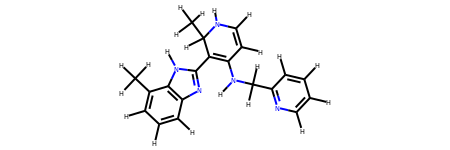

In [5]:
import rdkit.Chem as Chem
from IPython.display import SVG
from rdkit.Chem.Draw import IPythonConsole
import copy
from rdkit.Chem import AllChem

m = copy.deepcopy(s2.mol)
AllChem.Compute2DCoords(m)
m

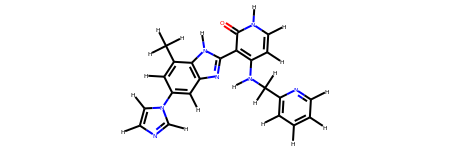

In [6]:
import rdkit.Chem as Chem
from IPython.display import SVG
from rdkit.Chem.Draw import IPythonConsole
import copy
from rdkit.Chem import AllChem

m = copy.deepcopy(s1.mol)
AllChem.Compute2DCoords(m)
m

[mutate.py:91 - _calculate_common_core()] Mol in SMILES format: [H]c1nc(C([H])([H])N([H])c2c([H])c([H])n([H])c(=O)c2-c2nc3c([H])c(-n4c([H])nc([H])c4[H])c([H])c(C([H])([H])[H])c3n2[H])c([H])c([H])c1[H].
[mutate.py:91 - _calculate_common_core()] Mol in SMILES format: [H]C1=C([H])N([H])C([H])(C([H])([H])[H])C(c2nc3c([H])c([H])c([H])c(C([H])([H])[H])c3n2[H])=C1N([H])C([H])([H])c1nc([H])c([H])c([H])c1[H].
[mutate.py:98 - _calculate_common_core()] Substructure match: [#6]1-,:[#7](-,:[#6](=,:[#6](-,:[#6](=,:[#6]-,:1-[#6]1:[#7](:[#6]2:[#6](:[#7]:1):[#6](:[#6]:[#6](:[#6]:2-[#6](-[#1])(-[#1])-[#1])-[#1])-[#1])-[#1])-[#7](-[#6](-[#6]1:[#6](:[#6](:[#6](:[#6](:[#7]:1)-[#1])-[#1])-[#1])-[#1])(-[#1])-[#1])-[#1])-[#1])-[#1])-[#1]
[mutate.py:104 - _calculate_common_core()] Substructere match idx: (0, 3, 6, 5, 4, 14, 24, 23, 26, 22, 25, 17, 16, 28, 27, 29, 46, 47, 48, 45, 41, 44, 2, 7, 11, 9, 8, 10, 13, 12, 39, 38, 36, 37, 34, 35, 30, 32, 33, 31)


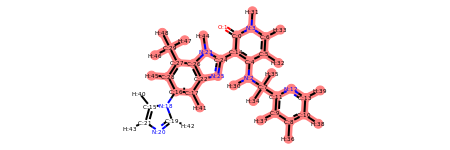

[mutate.py:107 - _calculate_common_core()] Substructere match idx: (0, 3, 6, 5, 4, 14, 19, 18, 21, 17, 20, 16, 15, 23, 22, 24, 43, 44, 45, 42, 40, 41, 2, 7, 11, 9, 8, 10, 13, 12, 38, 37, 35, 36, 33, 34, 29, 31, 32, 30)


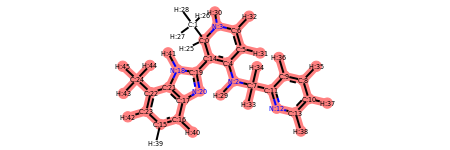

In [7]:
from transformato.mutate import ProposeMutationRoute
a = ProposeMutationRoute(s1, s2)

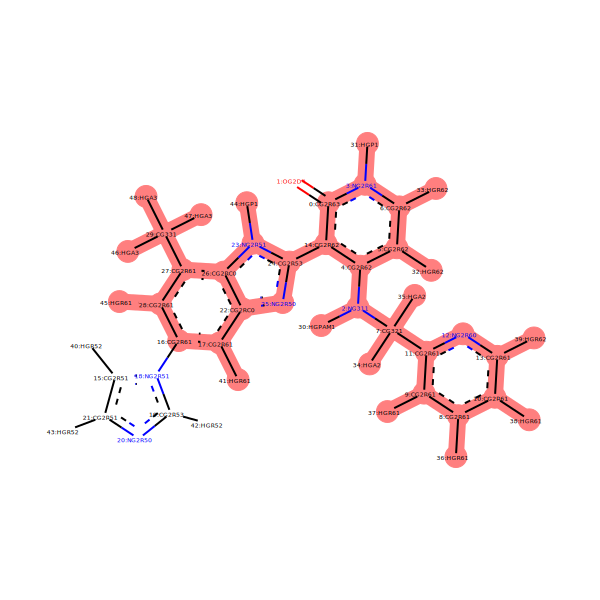

In [8]:
SVG(a.show_common_core_on_mol1())

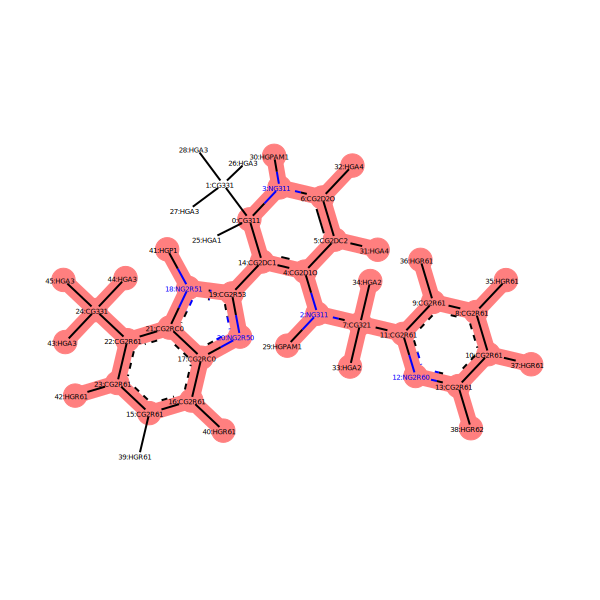

In [9]:
SVG(a.show_common_core_on_mol2())

In [10]:
mutation_list = a.generate_mutations_to_common_core_for_mol1()
#i = IntermediateStateFactory(s1, [mutation_list[-1]], conf)

[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:1 Elemeng:O
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:15 Elemeng:C
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:18 Elemeng:N
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:19 Elemeng:C
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:20 Elemeng:N
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:21 Elemeng:C
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:40 Elemeng:H
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:42 Elemeng:H
[mutate.py:248 - _mutate_to_common_core()] Will be decoupled: Idx:43 Elemeng:H
[mutate.py:211 - _transform_common_core()] ###########
[mutate.py:212 - _transform_common_core()] Atom that needs to be transformed: <Atom C1 [0]; In BMI 0>.
[mutate.py:213 - _transform_common_core()] Atom type of atom in cc1: CG2R63.
[mutate.py:214 - _transform_common_core()] Template ato

In [11]:
endkilltest

NameError: name 'endkilltest' is not defined

In [ ]:
mutation_list

In [ ]:
i.generate_intermediate_states()

In [ ]:
len(s1.waterbox_psf.dihedrals)

In [ ]:
imp = s1.waterbox_psf.impropers[0]
imp.atom1.residue.name

In [ ]:
imp.type.psi_k

In [ ]:
for cc1_torsion in s1.waterbox_psf.impropers:
    print([(elem.residue.name) for elem in [cc1_torsion.atom1, cc1_torsion.atom2, cc1_torsion.atom3, cc1_torsion.atom4]])

In [ ]:
l = [1,2,3]

In [ ]:
for a in l[-1:]:
    print(a)

In [ ]:
idx = 5
print(s1.waterbox_psf[idx].initial_type)

In [ ]:
import copy
for d in s1.waterbox_psf.dihedrals:
    for t in d.type:
        print(t.phi_k)


In [ ]:
len(s2.waterbox_psf.dihedrals)

In [ ]:
dir(s2.waterbox_psf)

In [ ]:
s2.waterbox_psf.dihedrals.append(d)

In [ ]:
len(s2.waterbox_psf.dihedrals)

In [ ]:
s1.waterbox_psf[0].type

In [ ]:
#mutation_list = a.generate_mutations_to_common_core_for_mol2()
#i = IntermediateStateFactory(s1, mutation_list, conf, 'test')

In [ ]:
a = {}

In [ ]:
sorted((3, 1, 2))

In [ ]:
a[sorted((3, 1, 2))] = 2

In [ ]:
for bond in s1.waterbox_psf[":BMI"].bonds:
    print(bond.atom1.name)


In [ ]:
m1.GetAtoms()[0].GetSymbol()

In [ ]:
s.atoms[0].element_name

In [ ]:
dir(s.atoms[0])

In [ ]:
a = s1.waterbox_psf

In [ ]:
a.dihedrals[0].type

In [ ]:
b = (s1.waterbox_psf[0].bonds[0])

In [ ]:
dir(b)

In [ ]:
s1.waterbox_psf[0].angles[0].atom1.epsilon

In [ ]:
dir(s1.waterbox_psf[0])

In [ ]:
s.dihedrals[0]

In [ ]:
s.dihedrals[0].type

In [ ]:
mutation_list = a.generate_mutations_to_commen_core_for_mol1()
i = IntermediateStateFactory(s1, mutation_list, conf, 'test')

In [ ]:
i.generate_intermediate_states()

In [ ]:
s = s1.waterbox_psf

In [ ]:
for i in s.impropers:
    print(i.type)

In [ ]:
a = s[1]

In [ ]:
b = s.bonds[0]

In [ ]:
b.type